In [62]:
import pandas as pd
from pathlib import Path
import os
import seaborn as sns
import matplotlib as plt

plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower

# get fGWAS results

In [43]:
gwas=pd.read_csv('/home/jovyan/data/fGWAS_v_LDSC/fetal_heart_all_results_22Oct22_with_efo_ids.csv',index_col='Study')
gwas['Celltype_fGWAS']=gwas['Celltype']
gwas=gwas.drop(['Celltype'],axis=1)
gwas

,logOR,FDR,Pvalue,Celltype,efo_id,trait,Celltype_fGWAS
Study,,,,,,,
GCST90043969,-0.047036,0.999975,0.999975,AtrialCardiomyocytesCycling,EFO_0000318,cardiomyopathy,AtrialCardiomyocytesCycling
GCST90043969,-0.170451,0.999975,0.999887,AtrialCardiomyocytesLeft,EFO_0000318,cardiomyopathy,AtrialCardiomyocytesLeft
GCST90043969,-0.194440,0.999975,0.999897,AtrialCardiomyocytesRight,EFO_0000318,cardiomyopathy,AtrialCardiomyocytesRight
GCST90043969,-0.125184,0.999975,0.999905,AtrioventricularNodeCardiomyocytes,EFO_0000318,cardiomyopathy,AtrioventricularNodeCardiomyocytes
GCST90043969,-0.299092,0.999975,0.999781,BCells,EFO_0000318,cardiomyopathy,BCells
...,...,...,...,...,...,...,...
GCST90080016,1.778650,0.790931,0.334281,VentricularCardiomyocytesCycling,EFO_0009276,ventricular ectopy,VentricularCardiomyocytesCycling
GCST90080016,1.366725,0.790931,0.355875,VentricularCardiomyocytesPRRX1pos,EFO_0009276,ventricular ectopy,VentricularCardiomyocytesPRRX1pos
GCST90080016,1.373514,0.790931,0.307946,VentricularCardiomyocytesTrabeculated,EFO_0009276,ventricular ectopy,VentricularCardiomyocytesTrabeculated


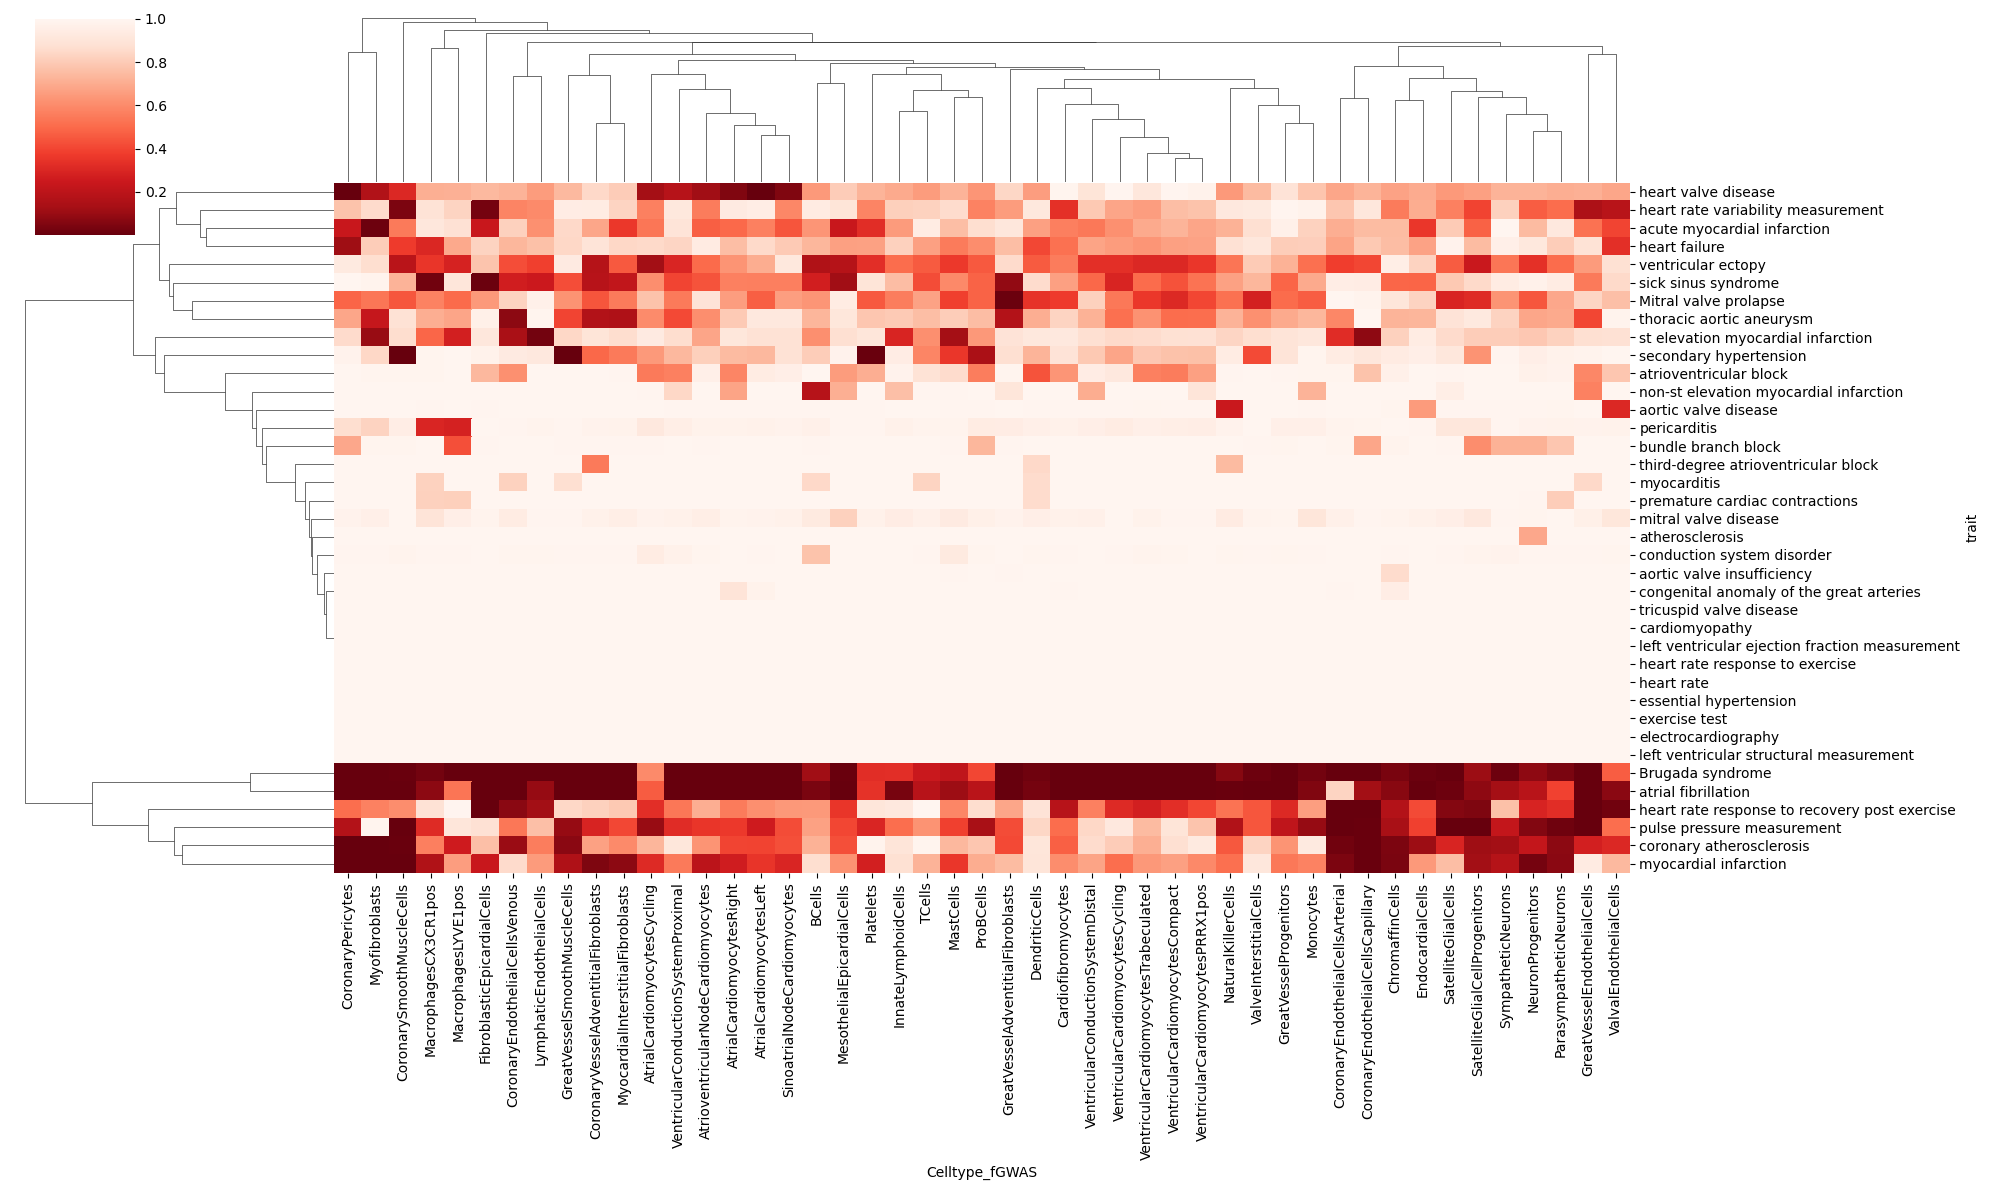

In [68]:
heatmap_df=gwas.pivot_table(index='trait', columns='Celltype_fGWAS', values='Pvalue')
sns.clustermap(heatmap_df,
           xticklabels=True,
           yticklabels=True,
              figsize=(20,12),
              cmap='Reds_r')

# get LDSC results

In [21]:
gwas_df = pd.read_csv(
    '/lustre/scratch126/cellgen/team205/sl37/cardio_ldsc/public_data/CV_trait_studies_filtered_2022-10-08.csv')
print(gwas_df.shape)
gwas_df.head(1)

(221, 23)


,study_id,reported_trait,initial_sample_size,replication_sample_size,gxe,gxg,snp_count,qualifier,imputed,pooled,...,type,number_of_individuals,pubmed_id,publication_date,author_fullname,publication,ancestral_group,EFO_id,EFO_term,accessed
0,GCST90134593,Right ventricular end systolic volume (MTAG),"29,498 European ancestry individuals","12,321 European ancestry individuals",0,0,7158086,NaN,1,-2147483648,...,initial,29498,35697868,13/06/2022,Aung N,Nat Genet,European,EFO_0021815,right ventricular systolic volume measurement,08/10/2022


In [22]:
processed_dir = Path("/lustre/scratch126/cellgen/team205/sl37/cardio_ldsc/public_data/ldsc_input/ready_to_use")
harmonised_studies = [x.split('.')[0].split('_')[1] for x in os.listdir(processed_dir) if x.endswith('_b38.tsv.gz')]
processed_studies = [x.split('.')[0].split('_')[1] for x in os.listdir(processed_dir) if x.endswith('sumstats.gz')]

In [23]:
gwas_df[~gwas_df['study_id'].isin(harmonised_studies)].shape, gwas_df[~gwas_df['study_id'].isin(processed_studies)].shape

((97, 23), (110, 23))

In [24]:
gwas_df[(~gwas_df['study_id'].isin(processed_studies)) & (gwas_df['study_id'].isin(harmonised_studies))][['pubmed_id', 'study_id']]

,pubmed_id,study_id
176,33772158,GCST90013538
177,32915819,GCST90012187
178,32915819,GCST90012182
179,32915819,GCST90012178
180,32915819,GCST90012176
181,32915819,GCST90012175
182,32915819,GCST90012174
185,32814899,GCST90000296
196,33230300,GCST90000060
197,33619380,GCST011330


In [25]:
gwas_df[~gwas_df['study_id'].isin(harmonised_studies)]['pubmed_id'].value_counts()

34662886    68
33893285     5
35240056     3
35697868     3
30940143     2
30525989     2
34737426     2
30104761     1
30012220     1
32887874     1
29695241     1
30535219     1
35479509     1
32439900     1
30586722     1
30003307     1
30224653     1
32382064     1
32916098     1
Name: pubmed_id, dtype: int64

In [26]:
gwas_dic = gwas_df[['study_id', 'reported_trait']].set_index('study_id')['reported_trait'].T.to_dict()

In [70]:
res_dir = Path("/lustre/scratch126/cellgen/team205/sl37/cardio_ldsc/ldsc_out_withbackground")
sig_res_concated_df = pd.DataFrame()
for filename in os.listdir(res_dir):
    if filename.endswith('cell_type_results.txt'):
        df = pd.read_csv(res_dir/filename, sep='\t', index_col=0)
        df['p_corrected'] = [(min(1, x*df.shape[0])) for x in df['Coefficient_P_value']]
        df['trait'] = gwas_dic.get(filename.split('.')[0].split('_')[1])
        df['study'] = filename.split('_')[1].split('.')[0]
        sig_df = df[df['p_corrected']<0.05]
        if sig_df.shape[0] > 1:
#            print(filename)
#            print(sig_df[['Coefficient_P_value']])
#            print('\n')
            sig_res_concated_df = pd.concat([sig_res_concated_df,
                                             df],
                                           axis=0)

In [71]:
sig_res_concated_df['CellType_LDSC']=sig_res_concated_df.index
sig_res_concated_df.set_index(['study'],inplace=True)
LDSC=sig_res_concated_df

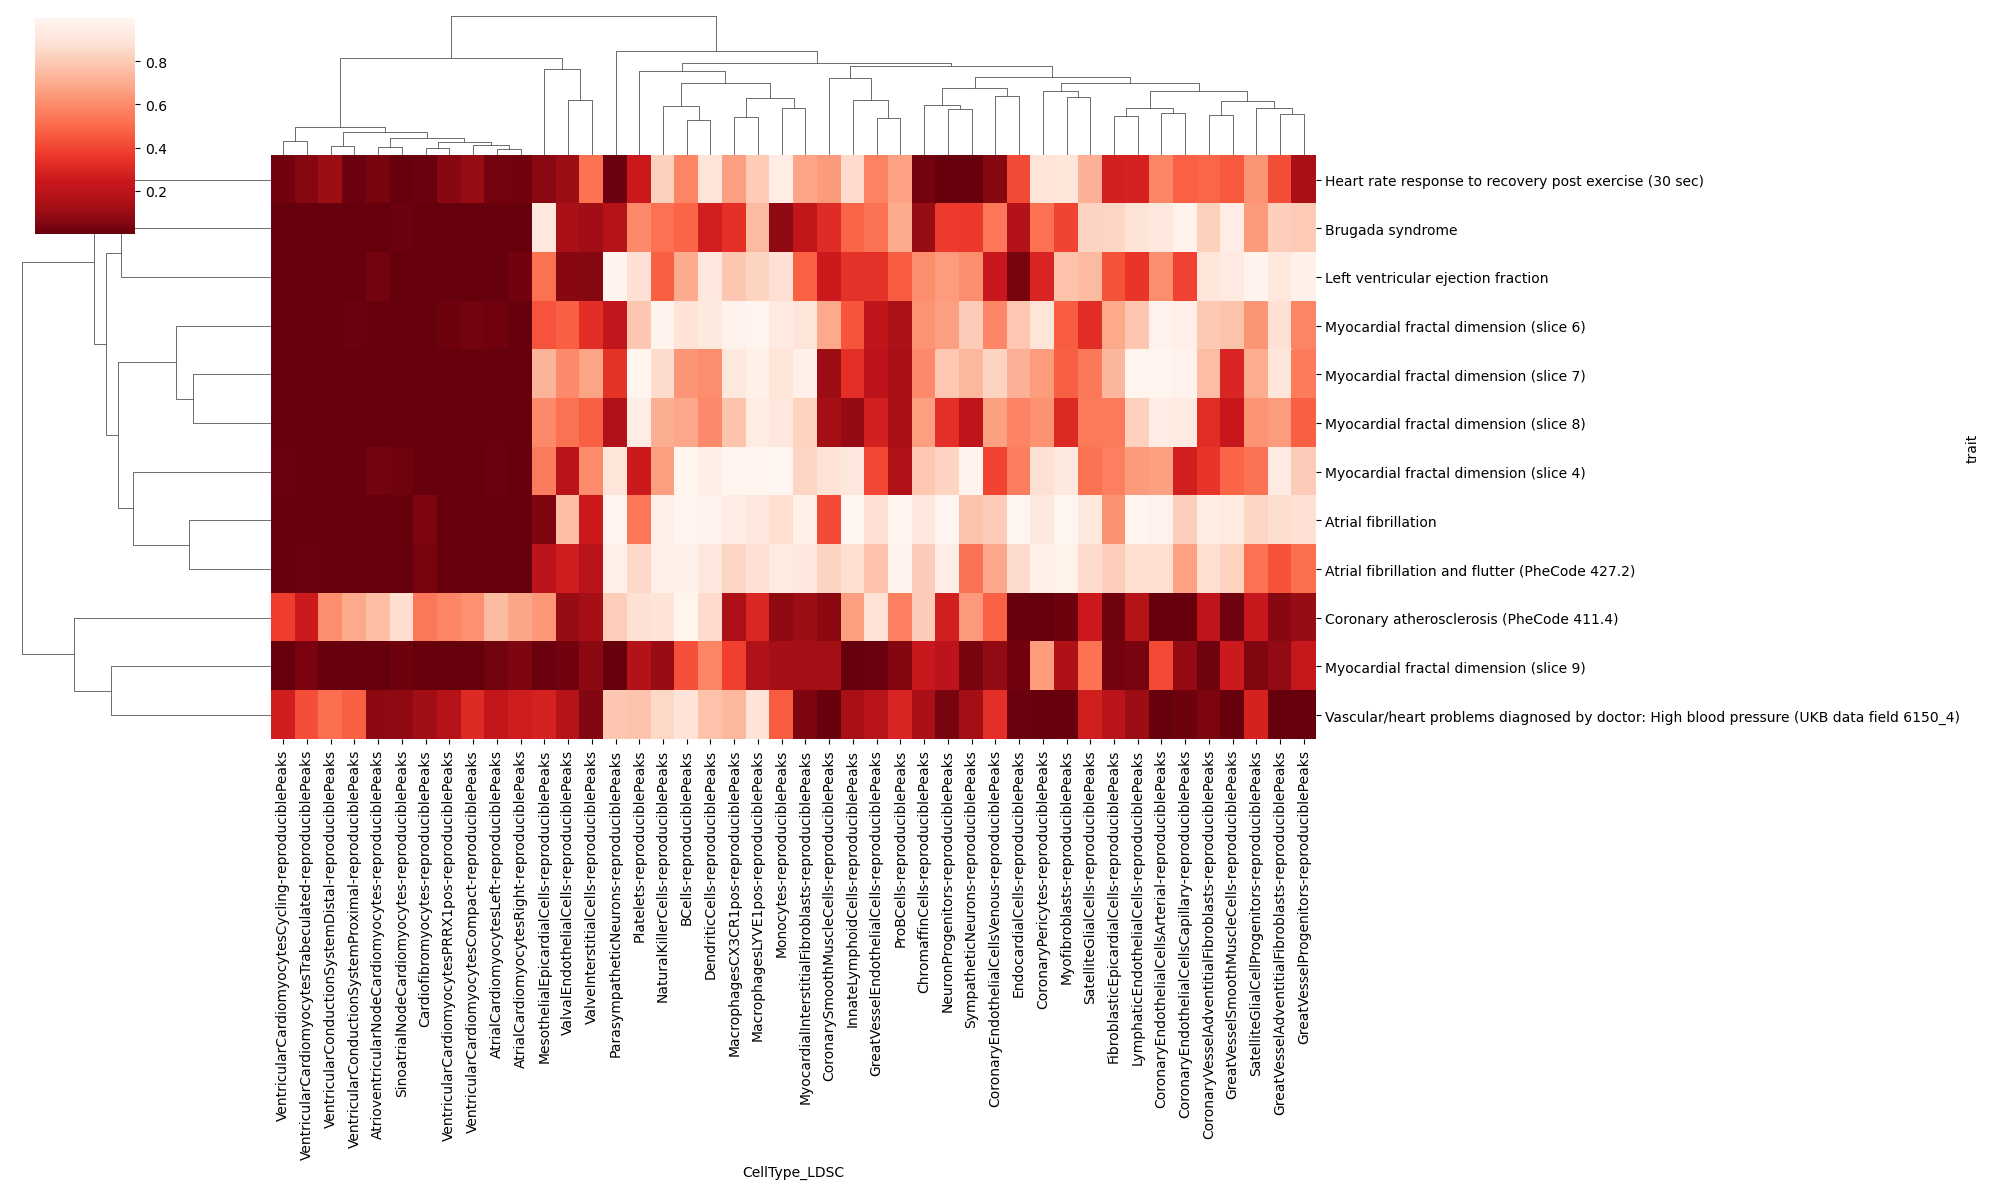

In [72]:
heatmap_df=LDSC.pivot_table(index='trait', columns='CellType_LDSC', values='Coefficient_P_value')
sns.clustermap(heatmap_df,
           xticklabels=True,
           yticklabels=True,
              figsize=(20,12),
              cmap='Reds_r')

In [76]:
LDSC[]LDSC['CellType_LDSC'].str.split('-',expand=True)[0]

,0,1
study,,
GCST005850,NeuronProgenitors,reproduciblePeaks
GCST005850,SympatheticNeurons,reproduciblePeaks
GCST005850,SinoatrialNodeCardiomyocytes,reproduciblePeaks
GCST005850,ParasympatheticNeurons,reproduciblePeaks
GCST005850,VentricularConductionSystemProximal,reproduciblePeaks
...,...,...
GCST90086158,LymphaticEndothelialCells,reproduciblePeaks
GCST90086158,CoronaryEndothelialCellsArterial,reproduciblePeaks
GCST90086158,MesothelialEpicardialCells,reproduciblePeaks


In [77]:
LDSC

,Coefficient,Coefficient_std_error,Coefficient_P_value,p_corrected,trait,CellType_LDSC
study,,,,,,
GCST005850,4.915986e-07,1.557809e-07,0.000801,0.036025,Heart rate response to recovery post exercise ...,NeuronProgenitors-reproduciblePeaks
GCST005850,4.798451e-07,1.565605e-07,0.001089,0.048989,Heart rate response to recovery post exercise ...,SympatheticNeurons-reproduciblePeaks
GCST005850,3.074226e-07,1.077773e-07,0.002170,0.097632,Heart rate response to recovery post exercise ...,SinoatrialNodeCardiomyocytes-reproduciblePeaks
GCST005850,3.474897e-07,1.454779e-07,0.008456,0.380527,Heart rate response to recovery post exercise ...,ParasympatheticNeurons-reproduciblePeaks
GCST005850,2.609917e-07,1.123043e-07,0.010064,0.452861,Heart rate response to recovery post exercise ...,VentricularConductionSystemProximal-reproducib...
...,...,...,...,...,...,...
GCST90086158,-8.183755e-07,6.617500e-07,0.891898,1.000000,Brugada syndrome,LymphaticEndothelialCells-reproduciblePeaks
GCST90086158,-7.640631e-07,5.390856e-07,0.921807,1.000000,Brugada syndrome,CoronaryEndothelialCellsArterial-reproducibleP...
GCST90086158,-7.965337e-07,5.550483e-07,0.924367,1.000000,Brugada syndrome,MesothelialEpicardialCells-reproduciblePeaks


In [75]:
gwas

,logOR,FDR,Pvalue,Celltype,efo_id,trait,Celltype_fGWAS
Study,,,,,,,
GCST90043969,-0.047036,0.999975,0.999975,AtrialCardiomyocytesCycling,EFO_0000318,cardiomyopathy,AtrialCardiomyocytesCycling
GCST90043969,-0.170451,0.999975,0.999887,AtrialCardiomyocytesLeft,EFO_0000318,cardiomyopathy,AtrialCardiomyocytesLeft
GCST90043969,-0.194440,0.999975,0.999897,AtrialCardiomyocytesRight,EFO_0000318,cardiomyopathy,AtrialCardiomyocytesRight
GCST90043969,-0.125184,0.999975,0.999905,AtrioventricularNodeCardiomyocytes,EFO_0000318,cardiomyopathy,AtrioventricularNodeCardiomyocytes
GCST90043969,-0.299092,0.999975,0.999781,BCells,EFO_0000318,cardiomyopathy,BCells
...,...,...,...,...,...,...,...
GCST90080016,1.778650,0.790931,0.334281,VentricularCardiomyocytesCycling,EFO_0009276,ventricular ectopy,VentricularCardiomyocytesCycling
GCST90080016,1.366725,0.790931,0.355875,VentricularCardiomyocytesPRRX1pos,EFO_0009276,ventricular ectopy,VentricularCardiomyocytesPRRX1pos
GCST90080016,1.373514,0.790931,0.307946,VentricularCardiomyocytesTrabeculated,EFO_0009276,ventricular ectopy,VentricularCardiomyocytesTrabeculated
